In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import copy
from pandas.plotting import register_matplotlib_converters
from sklearn import linear_model
from sklearn.metrics import r2_score
import copy
import os

In [2]:
watershed = 'Luquillo'

In [3]:
table = pd.read_csv('4_'+watershed+'_ClimateCatalog.csv',header = 0,index_col = 'DateTime',
                    parse_dates = True, infer_datetime_format = True,low_memory=False)

In [4]:
table_flag = pd.read_csv('4_'+watershed+'_ClimateCatalog_Flag.csv',header = 0,index_col = 'DateTime',
                    parse_dates = True, infer_datetime_format = True,low_memory=False)

In [5]:
table = copy.deepcopy(table.loc['1993-10-01':'2016-9-30'])
table.head(2)

RioMameyes_Discharge  RioSabana_Discharge  RioGrande_Discharge  \
DateTime                                                                     
1993-10-01             1585.7408            368.11840             594.6528   
1993-10-02             1076.0384            229.36608             339.8016   

            RioIcacos_Discharge  Sabana_Precipitation  EastPeak_Precipitation  \
DateTime                                                                        
1993-10-01            144.41568                   NaN                     NaN   
1993-10-02            164.23744                   NaN                     NaN   

            Bisley1_Precipitation  Bisley2_Precipitation  \
DateTime                                                   
1993-10-01                    NaN                    NaN   
1993-10-02                    NaN                    NaN   

            Sabana_AirTemperature  EastPeak_AirTemperature  ...  \
DateTime                                                    ...   
1993-10-01                    NaN                      NaN  ...   
1993-10-02                    NaN                      NaN  ...   

            Bisley1_WindSpeed  Bisley2_WindSpeed  EastPeak_VaporPressure  \
DateTime                                                                   
1993-10-01                NaN                NaN                     NaN   
1993-10-02                NaN                NaN                     NaN   

            PuertoRico_SoilMoisture_1  PuertoRico_SoilMoisture_2  \
DateTime                                                           
1993-10-01                        NaN                        NaN   
1993-10-02                        NaN                        NaN   

            PuertoRico_SoilMoisture_3  PuertoRico_SoilMoisture_4  \
DateTime                                                           
1993-10-01                        NaN                        NaN   
1993-10-02                        NaN                        NaN   

            PuertoRico_SoilMoisture_5  PuertoRico_SoilMoisture_6  \
DateTime                                                           
1993-10-01                        NaN                        NaN   
1993-10-02                        NaN                        NaN   

            PuertoRico_SoilMoisture_7  
DateTime                               
1993-10-01                        NaN  
1993-10-02                        NaN  

[2 rows x 27 columns]

In [6]:
table_flag = copy.deepcopy(table_flag.loc['1993-10-01':'2016-9-30'])
table_flag.head(2)

RioMameyes_Discharge  RioSabana_Discharge  RioGrande_Discharge  \
DateTime                                                                     
1993-10-01                   1.0                  1.0                  1.0   
1993-10-02                   1.0                  1.0                  1.0   

            RioIcacos_Discharge  Sabana_Precipitation  EastPeak_Precipitation  \
DateTime                                                                        
1993-10-01                  1.0                   NaN                     NaN   
1993-10-02                  1.0                   NaN                     NaN   

            Bisley1_Precipitation  Bisley2_Precipitation  \
DateTime                                                   
1993-10-01                    NaN                    NaN   
1993-10-02                    NaN                    NaN   

            Sabana_AirTemperature  EastPeak_AirTemperature  ...  \
DateTime                                                    ...   
1993-10-01                    NaN                      NaN  ...   
1993-10-02                    NaN                      NaN  ...   

            Bisley1_WindSpeed  Bisley2_WindSpeed  EastPeak_VaporPressure  \
DateTime                                                                   
1993-10-01                NaN                NaN                     NaN   
1993-10-02                NaN                NaN                     NaN   

            PuertoRico_SoilMoisture_1  PuertoRico_SoilMoisture_2  \
DateTime                                                           
1993-10-01                        NaN                        NaN   
1993-10-02                        NaN                        NaN   

            PuertoRico_SoilMoisture_3  PuertoRico_SoilMoisture_4  \
DateTime                                                           
1993-10-01                        NaN                        NaN   
1993-10-02                        NaN                        NaN   

            PuertoRico_SoilMoisture_5  PuertoRico_SoilMoisture_6  \
DateTime                                                           
1993-10-01                        NaN                        NaN   
1993-10-02                        NaN                        NaN   

            PuertoRico_SoilMoisture_7  
DateTime                               
1993-10-01                        NaN  
1993-10-02                        NaN  

[2 rows x 27 columns]

In [7]:
table.tail(3)

RioMameyes_Discharge  RioSabana_Discharge  RioGrande_Discharge  \
DateTime                                                                     
2016-09-28             382.27680           261.364064           221.437376   
2016-09-29             498.37568           282.318496           342.633280   
2016-09-30             489.88064           263.912576           614.474560   

            RioIcacos_Discharge  Sabana_Precipitation  EastPeak_Precipitation  \
DateTime                                                                        
2016-09-28           205.863136                   NaN                     1.5   
2016-09-29           234.179936                   NaN                     1.1   
2016-09-30           353.960000                   NaN                    13.4   

            Bisley1_Precipitation  Bisley2_Precipitation  \
DateTime                                                   
2016-09-28                    NaN                    NaN   
2016-09-29                    NaN                    NaN   
2016-09-30                    NaN                    NaN   

            Sabana_AirTemperature  EastPeak_AirTemperature  ...  \
DateTime                                                    ...   
2016-09-28                    NaN                    21.02  ...   
2016-09-29                    NaN                    20.77  ...   
2016-09-30                    NaN                    20.30  ...   

            Bisley1_WindSpeed  Bisley2_WindSpeed  EastPeak_VaporPressure  \
DateTime                                                                   
2016-09-28                NaN                NaN                     NaN   
2016-09-29                NaN                NaN                     NaN   
2016-09-30                NaN                NaN                     NaN   

            PuertoRico_SoilMoisture_1  PuertoRico_SoilMoisture_2  \
DateTime                                                           
2016-09-28                        NaN                        NaN   
2016-09-29                        NaN                        NaN   
2016-09-30                        NaN                        NaN   

            PuertoRico_SoilMoisture_3  PuertoRico_SoilMoisture_4  \
DateTime                                                           
2016-09-28                        NaN                        NaN   
2016-09-29                        NaN                        NaN   
2016-09-30                        NaN                        NaN   

            PuertoRico_SoilMoisture_5  PuertoRico_SoilMoisture_6  \
DateTime                                                           
2016-09-28                        NaN                        NaN   
2016-09-29                        NaN                        NaN   
2016-09-30                        NaN                        NaN   

            PuertoRico_SoilMoisture_7  
DateTime                               
2016-09-28                        NaN  
2016-09-29                        NaN  
2016-09-30                        NaN  

[3 rows x 27 columns]

In [8]:
table.to_csv('5_'+watershed+'_final_cleaned.csv', sep=',')

In [9]:
table_flag.to_csv('5_'+watershed+'_final_cleaned_flag.csv', sep=',')

### Add the isotope data

In [10]:
Isotope = pd.read_csv('1_'+ watershed + '_Download_Aggregation_Isotope.csv', index_col = 'DateTime')
Isotope.head(2)

LQR3_Isotope_2H_precipitation  LQR3_Isotope_18O_precipitation  \
DateTime                                                                    
1994-08-31                            NaN                             NaN   
1994-10-31                            NaN                             NaN   

            LQR4_Isotope_2H_precipitation  LQR4_Isotope_18O_precipitation  \
DateTime                                                                    
1994-08-31                            NaN                             NaN   
1994-10-31                            NaN                             NaN   

            LQR5a_Isotope_2H_precipitation  LQR5a_Isotope_18O_precipitation  \
DateTime                                                                      
1994-08-31                             NaN                              NaN   
1994-10-31                             NaN                              NaN   

            LQR5b_Isotope_2H_precipitation  LQR5b_Isotope_18O_precipitation  \
DateTime                                                                      
1994-08-31                             NaN                              NaN   
1994-10-31                             NaN                              NaN   

            LQR6_Isotope_2H_precipitation  LQR6_Isotope_18O_precipitation  \
DateTime                                                                    
1994-08-31                            NaN                             NaN   
1994-10-31                            NaN                             NaN   

            ...  LQS15_Isotope_2H_discharge  LQS15_Isotope_18O_discharge  \
DateTime    ...                                                            
1994-08-31  ...                         NaN                          NaN   
1994-10-31  ...                         NaN                          NaN   

            LQS16_Isotope_2H_discharge  LQS16_Isotope_18O_discharge  \
DateTime                                                              
1994-08-31                         NaN                          NaN   
1994-10-31                         NaN                          NaN   

            LQS17_Isotope_2H_discharge  LQS17_Isotope_18O_discharge  \
DateTime                                                              
1994-08-31                         NaN                          NaN   
1994-10-31                         NaN                          NaN   

            LQS18_Isotope_2H_discharge  LQS18_Isotope_18O_discharge  \
DateTime                                                              
1994-08-31                         NaN                          NaN   
1994-10-31                         NaN                          NaN   

            LQS19_Isotope_2H_discharge  LQS19_Isotope_18O_discharge  
DateTime                                                             
1994-08-31                         NaN                          NaN  
1994-10-31                         NaN                          NaN  

[2 rows x 56 columns]

In [11]:
Isotope.tail(2)

LQR3_Isotope_2H_precipitation  LQR3_Isotope_18O_precipitation  \
DateTime                                                                    
2013-06-30                            NaN                             NaN   
2013-07-31                            NaN                             NaN   

            LQR4_Isotope_2H_precipitation  LQR4_Isotope_18O_precipitation  \
DateTime                                                                    
2013-06-30                            NaN                             NaN   
2013-07-31                            NaN                             NaN   

            LQR5a_Isotope_2H_precipitation  LQR5a_Isotope_18O_precipitation  \
DateTime                                                                      
2013-06-30                             NaN                              NaN   
2013-07-31                             NaN                              NaN   

            LQR5b_Isotope_2H_precipitation  LQR5b_Isotope_18O_precipitation  \
DateTime                                                                      
2013-06-30                             NaN                              NaN   
2013-07-31                             NaN                              NaN   

            LQR6_Isotope_2H_precipitation  LQR6_Isotope_18O_precipitation  \
DateTime                                                                    
2013-06-30                            NaN                             NaN   
2013-07-31                            NaN                             NaN   

            ...  LQS15_Isotope_2H_discharge  LQS15_Isotope_18O_discharge  \
DateTime    ...                                                            
2013-06-30  ...                         NaN                          NaN   
2013-07-31  ...                         NaN                          NaN   

            LQS16_Isotope_2H_discharge  LQS16_Isotope_18O_discharge  \
DateTime                                                              
2013-06-30                         NaN                          NaN   
2013-07-31                         NaN                          NaN   

            LQS17_Isotope_2H_discharge  LQS17_Isotope_18O_discharge  \
DateTime                                                              
2013-06-30                         NaN                          NaN   
2013-07-31                         NaN                          NaN   

            LQS18_Isotope_2H_discharge  LQS18_Isotope_18O_discharge  \
DateTime                                                              
2013-06-30                         NaN                          NaN   
2013-07-31                         NaN                          NaN   

            LQS19_Isotope_2H_discharge  LQS19_Isotope_18O_discharge  
DateTime                                                             
2013-06-30                         NaN                          NaN  
2013-07-31                         NaN                          NaN  

[2 rows x 56 columns]

In [12]:
result = copy.deepcopy(table.join(Isotope,how ='outer'))
result.index.rename('DateTime',inplace = True)
result.head(2)

RioMameyes_Discharge  RioSabana_Discharge  RioGrande_Discharge  \
DateTime                                                                     
1993-10-01             1585.7408            368.11840             594.6528   
1993-10-02             1076.0384            229.36608             339.8016   

            RioIcacos_Discharge  Sabana_Precipitation  EastPeak_Precipitation  \
DateTime                                                                        
1993-10-01            144.41568                   NaN                     NaN   
1993-10-02            164.23744                   NaN                     NaN   

            Bisley1_Precipitation  Bisley2_Precipitation  \
DateTime                                                   
1993-10-01                    NaN                    NaN   
1993-10-02                    NaN                    NaN   

            Sabana_AirTemperature  EastPeak_AirTemperature  ...  \
DateTime                                                    ...   
1993-10-01                    NaN                      NaN  ...   
1993-10-02                    NaN                      NaN  ...   

            LQS15_Isotope_2H_discharge  LQS15_Isotope_18O_discharge  \
DateTime                                                              
1993-10-01                         NaN                          NaN   
1993-10-02                         NaN                          NaN   

            LQS16_Isotope_2H_discharge  LQS16_Isotope_18O_discharge  \
DateTime                                                              
1993-10-01                         NaN                          NaN   
1993-10-02                         NaN                          NaN   

            LQS17_Isotope_2H_discharge  LQS17_Isotope_18O_discharge  \
DateTime                                                              
1993-10-01                         NaN                          NaN   
1993-10-02                         NaN                          NaN   

            LQS18_Isotope_2H_discharge  LQS18_Isotope_18O_discharge  \
DateTime                                                              
1993-10-01                         NaN                          NaN   
1993-10-02                         NaN                          NaN   

            LQS19_Isotope_2H_discharge  LQS19_Isotope_18O_discharge  
DateTime                                                             
1993-10-01                         NaN                          NaN  
1993-10-02                         NaN                          NaN  

[2 rows x 83 columns]

In [13]:
result.to_csv('5_'+watershed+'_final_cleaned.csv', sep=',')

In [14]:
isotope_flag = np.nan*np.ones([table.shape[0] , len(Isotope.columns)])
df_isotope_flag = pd.DataFrame(isotope_flag, index=table_flag.index, columns=Isotope.columns) 
df_isotope_flag.head(2)

LQR3_Isotope_2H_precipitation  LQR3_Isotope_18O_precipitation  \
DateTime                                                                    
1993-10-01                            NaN                             NaN   
1993-10-02                            NaN                             NaN   

            LQR4_Isotope_2H_precipitation  LQR4_Isotope_18O_precipitation  \
DateTime                                                                    
1993-10-01                            NaN                             NaN   
1993-10-02                            NaN                             NaN   

            LQR5a_Isotope_2H_precipitation  LQR5a_Isotope_18O_precipitation  \
DateTime                                                                      
1993-10-01                             NaN                              NaN   
1993-10-02                             NaN                              NaN   

            LQR5b_Isotope_2H_precipitation  LQR5b_Isotope_18O_precipitation  \
DateTime                                                                      
1993-10-01                             NaN                              NaN   
1993-10-02                             NaN                              NaN   

            LQR6_Isotope_2H_precipitation  LQR6_Isotope_18O_precipitation  \
DateTime                                                                    
1993-10-01                            NaN                             NaN   
1993-10-02                            NaN                             NaN   

            ...  LQS15_Isotope_2H_discharge  LQS15_Isotope_18O_discharge  \
DateTime    ...                                                            
1993-10-01  ...                         NaN                          NaN   
1993-10-02  ...                         NaN                          NaN   

            LQS16_Isotope_2H_discharge  LQS16_Isotope_18O_discharge  \
DateTime                                                              
1993-10-01                         NaN                          NaN   
1993-10-02                         NaN                          NaN   

            LQS17_Isotope_2H_discharge  LQS17_Isotope_18O_discharge  \
DateTime                                                              
1993-10-01                         NaN                          NaN   
1993-10-02                         NaN                          NaN   

            LQS18_Isotope_2H_discharge  LQS18_Isotope_18O_discharge  \
DateTime                                                              
1993-10-01                         NaN                          NaN   
1993-10-02                         NaN                          NaN   

            LQS19_Isotope_2H_discharge  LQS19_Isotope_18O_discharge  
DateTime                                                             
1993-10-01                         NaN                          NaN  
1993-10-02                         NaN                          NaN  

[2 rows x 56 columns]

In [15]:
result_flag = copy.deepcopy(table_flag.join(df_isotope_flag,how ='outer'))
result_flag.index.rename('DateTime',inplace = True)
result_flag.head(2)

RioMameyes_Discharge  RioSabana_Discharge  RioGrande_Discharge  \
DateTime                                                                     
1993-10-01                   1.0                  1.0                  1.0   
1993-10-02                   1.0                  1.0                  1.0   

            RioIcacos_Discharge  Sabana_Precipitation  EastPeak_Precipitation  \
DateTime                                                                        
1993-10-01                  1.0                   NaN                     NaN   
1993-10-02                  1.0                   NaN                     NaN   

            Bisley1_Precipitation  Bisley2_Precipitation  \
DateTime                                                   
1993-10-01                    NaN                    NaN   
1993-10-02                    NaN                    NaN   

            Sabana_AirTemperature  EastPeak_AirTemperature  ...  \
DateTime                                                    ...   
1993-10-01                    NaN                      NaN  ...   
1993-10-02                    NaN                      NaN  ...   

            LQS15_Isotope_2H_discharge  LQS15_Isotope_18O_discharge  \
DateTime                                                              
1993-10-01                         NaN                          NaN   
1993-10-02                         NaN                          NaN   

            LQS16_Isotope_2H_discharge  LQS16_Isotope_18O_discharge  \
DateTime                                                              
1993-10-01                         NaN                          NaN   
1993-10-02                         NaN                          NaN   

            LQS17_Isotope_2H_discharge  LQS17_Isotope_18O_discharge  \
DateTime                                                              
1993-10-01                         NaN                          NaN   
1993-10-02                         NaN                          NaN   

            LQS18_Isotope_2H_discharge  LQS18_Isotope_18O_discharge  \
DateTime                                                              
1993-10-01                         NaN                          NaN   
1993-10-02                         NaN                          NaN   

            LQS19_Isotope_2H_discharge  LQS19_Isotope_18O_discharge  
DateTime                                                             
1993-10-01                         NaN                          NaN  
1993-10-02                         NaN                          NaN  

[2 rows x 83 columns]

In [16]:
result_flag.to_csv('5_'+watershed+'_final_cleaned_flag.csv', sep=',')

### Track the exact time range

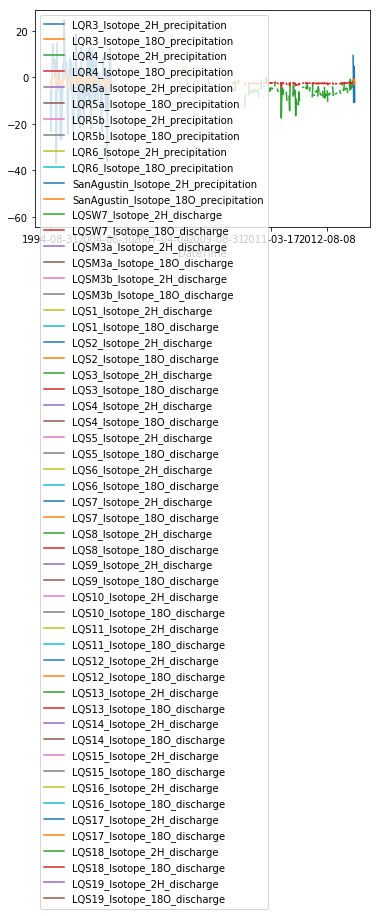

In [17]:
Isotope.plot()

In [18]:
var_array = pd.Series([i.split('_')[1] for i in result.columns]).unique()
for var in var_array:
    #var = 'SoilMoisture'
    #print(var)
    var_column = []
    for k in result.columns:
        if k.split('_')[1] == var:
            var_column.append(k)
    var_table = result[var_column]
    #display(var_table.head(2))
    for i in range(var_table.shape[0]):
        
        if any(var_table.iloc[i,:].notnull()) == True: # Any one of them is true
            print(var)
            #print(var_table.iloc[i,:])
            start = var_table.index[i]
            break
            
    for i in range(1,var_table.shape[0]):
        if any(var_table.iloc[-i,:].notnull()) == True: # Since some are empty
            print(var)
            over = var_table.index[-i]
            break
            
    print(var, str(start)[:-9], ',',str(over)[:-9])

Discharge
Discharge
Discharge 1993-10-01 , 2016-09-30
Precipitation
Precipitation
Precipitation 2001-01-01 , 2016-09-30
AirTemperature
AirTemperature
AirTemperature 2001-01-01 , 2016-09-30
RelativeHumidity
RelativeHumidity
RelativeHumidity 2001-01-01 , 2016-08-01
WindDirection
WindDirection
WindDirection 2000-12-31 , 2016-08-01
WindSpeed
WindSpeed
WindSpeed 1993-12-31 , 2016-08-01
VaporPressure
VaporPressure
VaporPressure 2002-01-01 , 2009-11-23
SoilMoisture
SoilMoisture
SoilMoisture 2014-11-14 , 2016-02-24
Isotope
Isotope
Isotope 1994-08-31 , 2013-07-31


In [19]:
Isotope.columns

Index(['LQR3_Isotope_2H_precipitation', 'LQR3_Isotope_18O_precipitation',
       'LQR4_Isotope_2H_precipitation', 'LQR4_Isotope_18O_precipitation',
       'LQR5a_Isotope_2H_precipitation', 'LQR5a_Isotope_18O_precipitation',
       'LQR5b_Isotope_2H_precipitation', 'LQR5b_Isotope_18O_precipitation',
       'LQR6_Isotope_2H_precipitation', 'LQR6_Isotope_18O_precipitation',
       'SanAgustin_Isotope_2H_precipitation',
       'SanAgustin_Isotope_18O_precipitation', 'LQSW7_Isotope_2H_discharge',
       'LQSW7_Isotope_18O_discharge', 'LQSM3a_Isotope_2H_discharge',
       'LQSM3a_Isotope_18O_discharge', 'LQSM3b_Isotope_2H_discharge',
       'LQSM3b_Isotope_18O_discharge', 'LQS1_Isotope_2H_discharge',
       'LQS1_Isotope_18O_discharge', 'LQS2_Isotope_2H_discharge',
       'LQS2_Isotope_18O_discharge', 'LQS3_Isotope_2H_discharge',
       'LQS3_Isotope_18O_discharge', 'LQS4_Isotope_2H_discharge',
       'LQS4_Isotope_18O_discharge', 'LQS5_Isotope_2H_discharge',
       'LQS5_Isotope_18O_dischar

In [20]:
Isotope.index

Index(['1994-08-31', '1994-10-31', '1994-11-30', '1994-12-31', '1995-02-28',
       '1995-04-30', '1995-05-31', '1995-06-30', '1995-07-31', '1995-08-31',
       ...
       '2013-03-14', '2013-03-20', '2013-03-26', '2013-03-31', '2013-04-03',
       '2013-04-10', '2013-04-30', '2013-05-31', '2013-06-30', '2013-07-31'],
      dtype='object', name='DateTime', length=552)

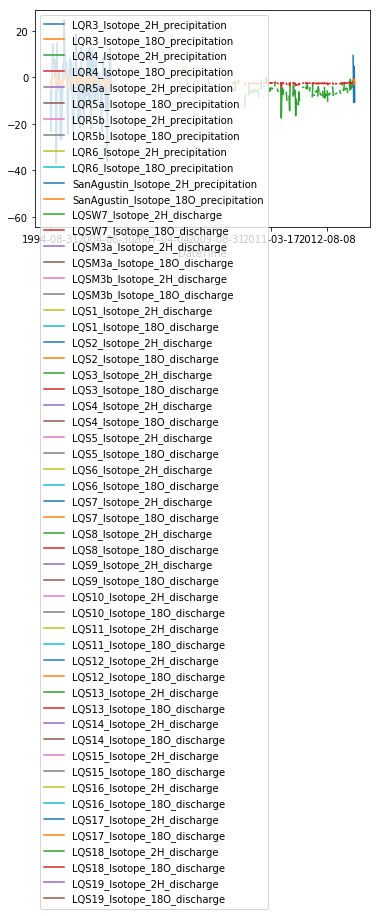

In [21]:
Isotope.plot()